<a href="https://colab.research.google.com/github/Binho-do-Boa/Atividades_UFMT/blob/main/Regressao_Atualizada_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('matogrosso.csv')
df.head()

,NOME_MUNICIPIO,CODIGO,GENTILICO,PREFEITO2017,AREA,POPESTIMADA,DENSIDADE,ESCOLARIZACAO,IDHM,MORTALIDADE,RECEITAS,DESPESAS,PIB
0,Acorizal,5100102,acorizano,CLODOALDO MONTEIRO DA SILVA,1014.029,5424,6.56,96.6,0.628,16.13,NaN,NaN,13362.95
1,Água Boa,5100201,água-boense,MAURO ROSA DA SILVA,7510.635,25229,2.79,99.2,0.729,10.23,92166.40674,81874.15633,37449.63
2,Alta Floresta,5100250,alta-florestense,ASIEL BEZERRA DE ARAUJO,8953.191,51615,5.48,98.0,0.714,19.19,146439.79095,118288.01810,31623.80
3,Alto Araguaia,5100300,araguaiano,GUSTAVO DE MELO ANICEZIO,5399.326,18703,2.84,96.7,0.704,9.09,63035.52537,55216.26966,50298.54
4,Alto Boa Vista,5100359,alto boa vistense,VALTUIR CANDIDO DA SILVA,2240.438,6659,2.34,96.8,0.651,37.04,23227.72780,20002.89582,16877.29


In [62]:
x = df[['ESCOLARIZACAO']]
y = df['IDHM']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [65]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()

In [66]:
regressao.fit(X_train,y_train)

LinearRegression()

In [67]:
print('Coeficientes: ', regressao.intercept_, regressao.coef_)

Coeficientes:  0.18393135483062284 [0.00520584]


Text(0, 0.5, 'IDHM estimado')

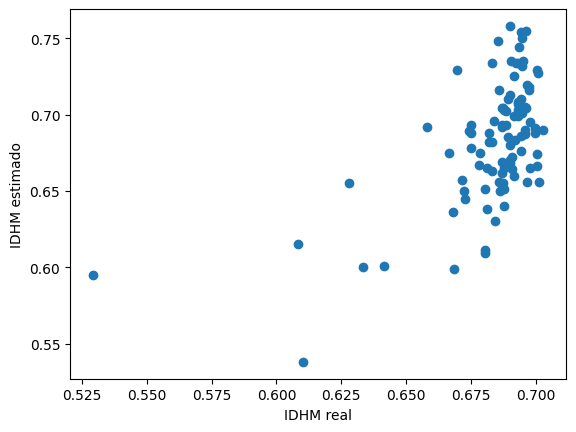

In [68]:
predicao = regressao.predict(X_train)

plt.scatter(predicao,y_train)
plt.xlabel('IDHM real')
plt.ylabel('IDHM estimado')

In [69]:
from sklearn import metrics

In [70]:
print('r2:', metrics.r2_score(y_train, predicao))
print('MAE:', metrics.mean_absolute_error(y_train, predicao))
print('MSE:', metrics.mean_squared_error(y_train, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicao)))

r2: 0.33627001195642225
MAE: 0.026126268819102082
MSE: 0.0010379589791239627
RMSE: 0.032217370766776776


In [71]:
predicao = regressao.predict(X_test)

print('r2:', metrics.r2_score(y_test, predicao))
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

r2: 0.08118201076890674
MAE: 0.02483897858488661
MSE: 0.0010979373075060003
RMSE: 0.03313513705277225


### **Teste com modelo RandomForestRegressor e add novas colunas**

In [72]:
# Preencher valores nulos
df['RECEITAS'].fillna(df['RECEITAS'].mean(), inplace=True)
df['DESPESAS'].fillna(df['DESPESAS'].mean(), inplace=True)

In [73]:
# Selecionar características e alvo
X = df[['ESCOLARIZACAO', 'RECEITAS', 'DESPESAS', 'PIB']]
y = df['IDHM']

In [74]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
from sklearn.preprocessing import StandardScaler
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
rf = RandomForestRegressor(random_state=20)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=20)

In [78]:
predicao_rf = rf.predict(X_train)
print('R2:', metrics.r2_score(y_train, predicao_rf))
print('MAE:', metrics.mean_absolute_error(y_train, predicao_rf))
print('MSE:', metrics.mean_squared_error(y_train, predicao_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicao_rf)))

R2: 0.9458908121288537
MAE: 0.007243163265306136
MSE: 8.461741734693821e-05
RMSE: 0.009198772600023233


In [79]:
predicao_rf = rf.predict(X_test)
print('R2:', metrics.r2_score(y_test, predicao_rf))
print('MAE:', metrics.mean_absolute_error(y_test, predicao_rf))
print('MSE:', metrics.mean_squared_error(y_test, predicao_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao_rf)))

R2: 0.627421842455196
MAE: 0.016353255813953416
MSE: 0.0004452105465116261
RMSE: 0.021100012950508493


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME_MUNICIPIO  141 non-null    object 
 1   CODIGO          141 non-null    int64  
 2   GENTILICO       141 non-null    object 
 3   PREFEITO2017    141 non-null    object 
 4   AREA            141 non-null    float64
 5   POPESTIMADA     141 non-null    int64  
 6   DENSIDADE       141 non-null    float64
 7   ESCOLARIZACAO   141 non-null    float64
 8   IDHM            141 non-null    float64
 9   MORTALIDADE     141 non-null    object 
 10  RECEITAS        141 non-null    float64
 11  DESPESAS        141 non-null    float64
 12  PIB             141 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.4+ KB


In [81]:
df.head()

,NOME_MUNICIPIO,CODIGO,GENTILICO,PREFEITO2017,AREA,POPESTIMADA,DENSIDADE,ESCOLARIZACAO,IDHM,MORTALIDADE,RECEITAS,DESPESAS,PIB
0,Acorizal,5100102,acorizano,CLODOALDO MONTEIRO DA SILVA,1014.029,5424,6.56,96.6,0.628,16.13,80650.793638,71032.62096,13362.95
1,Água Boa,5100201,água-boense,MAURO ROSA DA SILVA,7510.635,25229,2.79,99.2,0.729,10.23,92166.406740,81874.15633,37449.63
2,Alta Floresta,5100250,alta-florestense,ASIEL BEZERRA DE ARAUJO,8953.191,51615,5.48,98.0,0.714,19.19,146439.790950,118288.01810,31623.80
3,Alto Araguaia,5100300,araguaiano,GUSTAVO DE MELO ANICEZIO,5399.326,18703,2.84,96.7,0.704,9.09,63035.525370,55216.26966,50298.54
4,Alto Boa Vista,5100359,alto boa vistense,VALTUIR CANDIDO DA SILVA,2240.438,6659,2.34,96.8,0.651,37.04,23227.727800,20002.89582,16877.29


Index(['Modelo', 'R2', 'MAE', 'MSE', 'RMSE'], dtype='object')


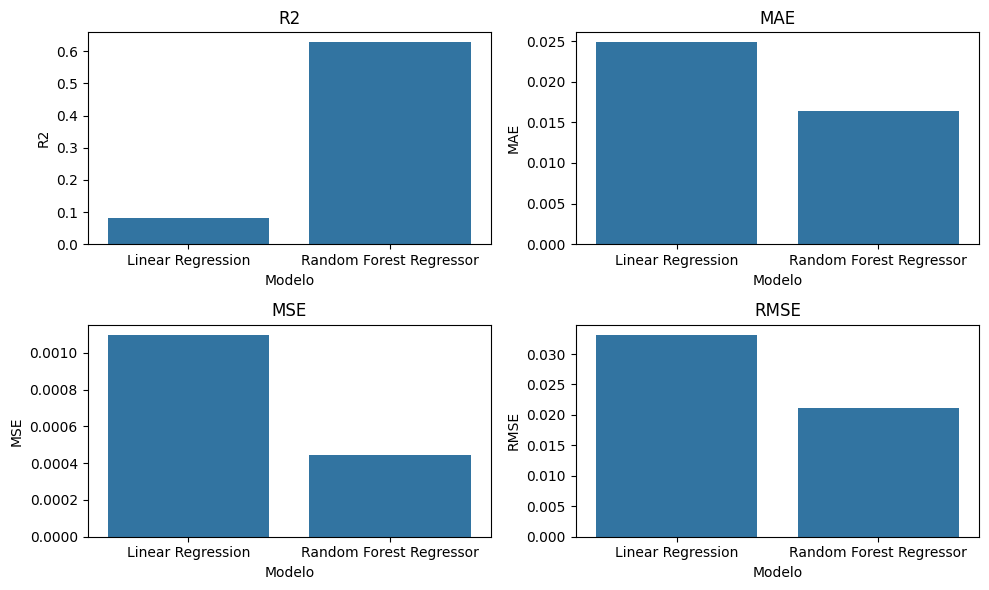

                    Modelo        R2       MAE       MSE      RMSE
0        Linear Regression  0.081182  0.024839  0.001098  0.033135
1  Random Forest Regressor  0.627422  0.016353  0.000445  0.021100


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Métricas calculadas para cada modelo
linear_metrics = {
    'Modelo': 'Linear Regression',
    'R2':   0.08118201076890674,
    'MAE':  0.02483897858488661,
    'MSE':  0.0010979373075060003,
    'RMSE': 0.03313513705277225
}

rf_metrics = {
    'Modelo': 'Random Forest Regressor',
    'R2':   0.627421842455196,
    'MAE':  0.016353255813953416,
    'MSE':  0.0004452105465116261,
    'RMSE': 0.021100012950508493
}

# Cria DataFrame com as métricas
metrics_df = pd.DataFrame([linear_metrics, rf_metrics])

# Verificar colunas do DataFrame
print(metrics_df.columns)

# Plotar gráficos comparando as métricas dos modelos
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Colocar as métricas
sns.barplot(x='Modelo', y='R2', data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title('R2') # Alterando o título para 'R2'

sns.barplot(x='Modelo', y='MAE', data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title('MAE')

sns.barplot(x='Modelo', y='MSE', data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title('MSE')

sns.barplot(x='Modelo', y='RMSE', data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title('RMSE')

plt.tight_layout()
plt.show()

# Métricas
print(metrics_df)